# Nim (21 Sticks Variant)

## Setup
- Start with **21 sticks** (or counters, stones, matches, etc.).  
- Two players take turns.  

---

## Rules
1. On your turn, you must take **1, 2, or 3 sticks** from the pile.  
2. Players alternate turns.  
3. **The player forced to take the last stick loses.**  

---

## Example Play
- Start: 21 sticks.  
- Player A takes 2 → 19 left.  
- Player B takes 3 → 16 left.  
- Player A takes 1 → 15 left.  
- … and so on, until one player is forced to take the last stick and loses.  



In [1]:
from Game import *

Version:  0.3.15


In [2]:
def initial_state():
    return 21

In [3]:
def show_state(state,player):
    print("Player",player)
    print(f"Sticks remaining: {state}")

In [4]:
def valid_moves(state,player):
    # return a **list** of moves that are valid

    if state==1:
        return [1]
    elif state==2:
        return [1,2]
    else:
        return [1,2,3]
    

In [5]:
def update_state(state,player,move):
    new_state = state - move
    return new_state

In [6]:
def win_status(state,player):
    # return None if the game is not over
    # return 'win' if player has won
    # return 'lose' if player has lost
    # return 'stalemate' if player has stalemate

    if player==1:
        other_player=2
    else:
        other_player=1

    if state==0:
        return 'lose'
    else:
        return None

## Agents

In [7]:
def human_move(state,player):
    move = int(input("Enter your move (1, 2, or 3): "))
    while move not in valid_moves(state,player):
        print("Invalid move. Try again.")
        move = int(input("Enter your move (1, 2, or 3): "))
    return move

human_agent=Agent(human_move)

In [8]:
def random_move(state,player):
    return random.choice(valid_moves(state,player))

random_agent=Agent(random_move)

In [9]:
from Game.minimax import *
def minimax_move(state,player):
    values,actions = minimax_values(state,player,display=False)
    return top_choice(actions,values)
minimax_agent=Agent(minimax_move)

## Skittle Agent

In [10]:
def skittles_move(state,player,info):
    T=info.T   # table for the skittles
    learning=info.learning
    last_state=info.last_state
    last_action=info.last_action
    

    # if we haven't seen this state before, initialize it
    if state not in T:
        actions=valid_moves(state,player)
        T[state]=Table()
        for action in actions:
            T[state][action]=2  # start with 1 skittle for each action

    move=weighted_choice(T[state])

    if move is None:
        move=random_move(state,player)

        if learning:
            if last_state:
                T[last_state][last_action]-=1  # punish last action == remove one skittle
                if T[last_state][last_action]<0:
                    T[last_state][last_action]=0  # don't go below zero
    
    return move


def skittles_after(status,player,info):
    T=info.T   # table for the skittles
    learning=info.learning
    last_state=info.last_state
    last_action=info.last_action

    if learning:
        if status=='lose':
            T[last_state][last_action]-=1  # punish last action == remove one skittle
            if T[last_state][last_action]<0:
                T[last_state][last_action]=0  # don't go below zero


In [11]:
skittles_agent=Agent(skittles_move)
skittles_agent.T=Table()  # starts off empty
skittles_agent.post=skittles_after
skittles_agent.learning=True

## Q-Learning Agent

In [12]:
def Q_move(state,player,info):
    Q=info.Q   # Q-table
    learning=info.learning
    last_state=info.last_state
    last_action=info.last_action
    α=info.α  # learning rate
    γ=info.γ  # discount factor
    ϵ=info.ϵ  # random games sometimes for exploration

    # if we haven't seen this state before, initialize it
    if state not in Q:
        actions=valid_moves(state,player)
        Q[state]=Table()
        for action in actions:
            Q[state][action]=0  # start with Q-value=0

    if learning and random.random()<ϵ:
        move=random_move(state,player)
    else:
        move=top_choice(Q[state])

    if not last_action is None:
        reward=0  # mid-game reward

        if learning:
            Q[last_state][last_action]+=α*(reward + 
                                          γ*max([Q[state][a] for a in Q[state]]) - Q[last_state][last_action])

    return move


In [13]:
def Q_after(status,player,info):
    Q=info.Q   # Q-table
    learning=info.learning
    last_state=info.last_state
    last_action=info.last_action
    α=info.α  # learning rate
    γ=info.γ  # discount factor
    ϵ=info.ϵ  # random games sometimes for exploration


    if status=='lose':
        reward=-1
    elif status=='win':
        reward=1
    elif status=='stalemate':
        reward=0.5
    else:
        reward=0

    if learning:
        Q[last_state][last_action]+=α*(reward - Q[last_state][last_action])

    

In [14]:
Q1_agent=Agent(Q_move)
Q1_agent.post=Q_after
Q1_agent.Q=Table()
Q1_agent.learning=True

Q1_agent.α=0.3  # learning rate
Q1_agent.γ=0.9  # discount factor
Q1_agent.ϵ=0.1  # random games sometimes for exploration


In [15]:
Q2_agent=Agent(Q_move)
Q2_agent.post=Q_after
Q2_agent.Q=Table()
Q2_agent.learning=True

Q2_agent.α=0.3  # learning rate
Q2_agent.γ=0.9  # discount factor
Q2_agent.ϵ=0.1  # random games sometimes for exploration


## Running the Game

In [16]:
g=Game()
g.run(minimax_agent,Q2_agent)

====
Game  1
Player 1
Sticks remaining: 21
Player 1 moves 2
Player 2
Sticks remaining: 19
Player 2 moves 3
Player 1
Sticks remaining: 16
Player 1 moves 3
Player 2
Sticks remaining: 13
Player 2 moves 1
Player 1
Sticks remaining: 12
Player 1 moves 3
Player 2
Sticks remaining: 9
Player 2 moves 3
Player 1
Sticks remaining: 6
Player 1 moves 1
Player 2
Sticks remaining: 5
Player 2 moves 2
Player 1
Sticks remaining: 3
Player 1 moves 2
Player 2
Sticks remaining: 1
Player 2 moves 1
Player 2
Sticks remaining: 0
Player  1 won.


[1]

In [17]:
Q2_agent.Q

{19: {1: 0, 2: 0, 3: 0.0},
 13: {1: 0.0, 2: 0, 3: 0},
 9: {1: 0, 2: 0, 3: 0.0},
 5: {1: 0, 2: 0.0, 3: 0},
 1: {1: -0.3}}

In [18]:
g=Game(number_of_games=500)
g.display=False
result=g.run(minimax_agent,Q2_agent)
print(result)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 

In [19]:
Q2_agent.Q

{19: {1: -0.2409969372625249, 2: 0.6560999999943921, 3: -0.5052881392990498},
 13: {1: -0.7254509892395591, 2: -0.7256592119685348, 3: -0.7261262754856049},
 9: {1: -0.8099791027509182, 2: -0.8099816107119608, 3: -0.8099755151653689},
 5: {1: -0.8999998961680965, 2: -0.8999998760890363, 3: -0.8999998598836073},
 1: {1: -0.9999999999999999},
 18: {1: 0.6560999999920829, 2: -0.5864554432244878, 3: -0.37896518609649815},
 17: {1: -0.5311501816791708, 2: -0.5072057221688832, 3: -0.4899515252534073},
 15: {1: -0.47172474640605544, 2: 0.7289999999980666, 3: -0.683377854380203},
 12: {1: -0.3767683211426378, 2: -0.6835435591035934, 3: 0.8099999999988688},
 11: {1: -0.6296699127509439, 2: 0.8099999999997786, 3: -0.6246702149045036},
 20: {1: -0.21864443083473456, 2: -0.2601631477165053, 3: 0.6560999999937779},
 10: {1: 0.8099999999995355, 2: -0.7367734983812644, 3: -0.49082160056539564},
 16: {1: -0.3919513901806738, 2: -0.5768397611052691, 3: 0.7289999999974048},
 7: {1: -0.6130780326598458, 

In [20]:
g=Game(number_of_games=500)
g.display=False
Q2_agent.learning=False
result=g.run(minimax_agent,Q2_agent)
print(result)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [21]:
SaveTable(Q2_agent.Q,'Nim21_Q2.json')

# Stages of training

- training stage == learning, changing # of skittles
- testing stage == fixed # of skittles, see how well it does
- epoch -- number of training games before testing


In [28]:
iteration_count=0
percentage_won_player1=[]
percentage_won_player2=[]
percentage_stalemate=[]
number_of_iterations=[]

In [29]:
Q1_agent=Agent(Q_move)
Q1_agent.post=Q_after
Q1_agent.Q=Table()
Q1_agent.learning=True

Q1_agent.α=0.3  # learning rate
Q1_agent.γ=0.9  # discount factor
Q1_agent.ϵ=0.1  # random games sometimes for exploration

Q2_agent=Agent(Q_move)
Q2_agent.post=Q_after
Q2_agent.Q=Table()
Q2_agent.learning=True

Q2_agent.α=0.3  # learning rate
Q2_agent.γ=0.9  # discount factor
Q2_agent.ϵ=0.1  # random games sometimes for exploration

agent1=Q1_agent
agent2=Q2_agent

In [30]:
epoch_number=300  # play  games, learning, and then test
N_test=100  # play  games, fixed skittles, see how well it does
N_train=1  # play  epochs, learning, changing skittles

total_number_of_games=epoch_number*N_train
total_number_of_games

300

In [31]:
from tqdm.notebook import tqdm
from IPython.display import display,clear_output

In [32]:
from matplotlib import pyplot as plt

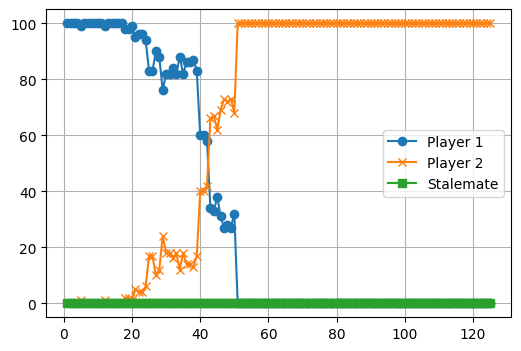

In [34]:
plt.close('all')
fig, ax = plt.subplots(figsize=(6, 4))
#plt.show(block=False)

for i in tqdm(range(epoch_number), desc="Updating plot", leave=True):
    try:
        # training step
        agent1.learning=True
        agent2.learning=True
    
        g=Game(number_of_games=N_train)
        g.display=False
        result=g.run(agent1,agent2)
    
        # testing step
        agent1.learning=False
        agent2.learning=False
    
        g=Game(number_of_games=N_test)
        g.display=False
        result=g.run(minimax_agent,agent2)
    
        iteration_count+=N_train
    
    
        percentage_won_player1.append(result.count(1)/N_test*100)
        percentage_won_player2.append(result.count(2)/N_test*100)
        percentage_stalemate.append(result.count(0)/N_test*100)
        number_of_iterations.append(iteration_count)
    
        clear_output(wait=True)
        ax.cla()
        ax.grid(True)
        
        ax.plot(number_of_iterations,percentage_won_player1,'-o',label="Player 1")
        ax.plot(number_of_iterations,percentage_won_player2,'-x',label="Player 2")
        ax.plot(number_of_iterations,percentage_stalemate,'-s',label="Stalemate")
        ax.legend()
    
        fig.canvas.draw()
        fig.canvas.flush_events()
        plt.show()
        display(fig)

    except KeyboardInterrupt:
        break